In [1]:
# import wandb

In [2]:
# vars(wandb).keys()

In [3]:
# api = wandb.Api()

In [4]:
# !wandb offline

In [5]:
# run = api.run("neverix/mingpt-cubic/prune 1.0")

In [6]:
import glob
names = glob.glob("wandb/**/*.wandb")
wandbs = [open(x, "rb").read() for x in names]
wandbs[0][:2000]

b':W&B\xe1\xbe\x00\x8eQ\x0cT\x03\x00\x01\xaa\x01\x00c\x80)\x9c\x05\x01\x01\x82\x01\x02\x08\x01\x8a\x01\xd9\x01\n\x083ujqyvvf\x1a\x0cmingpt-cubic">\n<\n\x06_wandb\x82\x011{"code_path": "code/projects/chargpt/chargpt.py"}j\x06pop-os\x8a\x01\x06\x08\xb2\x9f\xcc\x9c\x06\x9a\x01\x1d\n\x05\x08\x01\xb8\x03\x01"\x053.8.8*\x070.12.21B\x04\x10\x01(\x01\xaa\x01M\n!https://github.com/neverix/mingpt\x12(599afe30b1270cde089a8511f652e17484997b2d\x9a\x01 35d53d1f86224968b234a136b386e512X.\x18\xf5\x1f\x00\x01Z\x1d\n\x05\x08\x01\xb8\x03\x01"\x053.8.8*\x070.12.21B\x04\x10\x01(\x01\xb9\x0fb}X\x00\x01\x12V\n\x1a\n\x04loss\x82\x01\x118.811593055725098\n\x19\n\n_timestamp\x82\x01\n1670582202\n\x0e\n\x08_runtime\x82\x01\x018\n\x0b\n\x05_step\x82\x01\x010\x12\x00>\x15\x00\xd1X\x00\x01\x12V\n\x18\n\x04loss\x82\x01\x0f7.2733473777771\n\x19\n\n_timestamp\x82\x01\n1670582202\n\x0e\n\x08_runtime\x82\x01\x018\n\x0b\n\x05_step\x82\x01\x011\x12\x02\x08\x01\xf2\x7f\x8d\x8a>\x00\x01"<\x08\x01\x12\x0b\x08\xbb\x9f\xcc\x9c

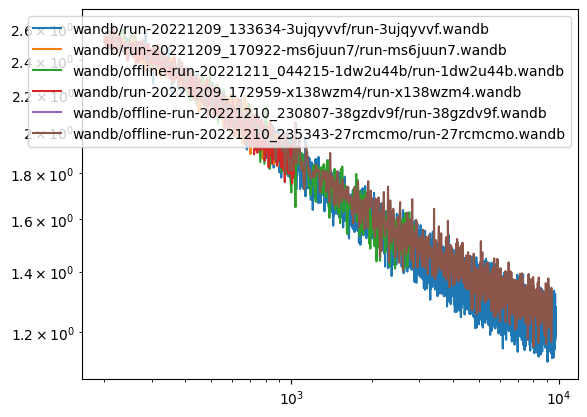

In [7]:
from matplotlib import pyplot as plt


for m, w in zip(names, wandbs):
    if "late" in m:  # not in m:
        continue
    stamps = []
    for a in w.split(b"loss")[1:]:
        try:
            n = float(a[3:].split(b"\n")[0].decode("ascii"))
        except UnicodeDecodeError:
            continue
        except ValueError:
            continue
        try:
            num = a.split(b"_step")[1]
            u = int(num[2])
            t = int(num[3:3+u].decode("utf-8"))
        except UnicodeDecodeError:
            continue
        except IndexError:
            continue
        if "offline" in m:
            n *= 2
        stamps.append((t, n))
    plt.loglog(*zip(*[(a, b) for a, b in stamps if a > 199]), label=m)
plt.legend()
plt.show()